In [6]:
actual_positive = 95
total_data = 10000
actual_negative = total_data - actual_positive

In [7]:
def precision(tp, fp):
    denominator = tp + fp
    if denominator == 0:
        return 0
    return tp/ denominator
def recall(tp, fn):
    denominator = tp + fn
    if denominator == 0:
        return 0
    return tp/denominator
def f1score(tp, fp, fn):
    prec = precision(tp, fp)
    rec = recall(tp, fn)
    denominator = prec+ rec
    if denominator == 0:
        return 0
    return 2 * (prec * rec) / denominator
def fbeta(tp, fp, fn, beta=0.5):
    prec = precision(tp, fp)
    rec = recall(tp, fn)
    denominator = beta**2 * prec + rec
    if denominator == 0:
        return 0
    return (1+beta**2) * (prec * rec) / denominator

In [8]:
def compute_total_cash(tp, fp, fn, tn):
    return tp * -50 + fp * -50 + fn * -1050 + tn * 150

In [9]:
baseline_cash = compute_total_cash(0, 0, actual_positive, actual_negative)
threshold_cash_line = baseline_cash + 30000

In [13]:
f1_scores = []
f2_scores = []
total_cash = []
for tp in range(0, 96):
    fn = 95 - tp
    for fp in range(0, actual_negative):
        tn = total_data - tp - fp - fn
        f1_scores.append(f1score(tp, fp, fn))
        f2_scores.append(fbeta(tp, fp, fn, beta=2.0))
        total_cash.append(compute_total_cash(tp, fp, fn, tn))

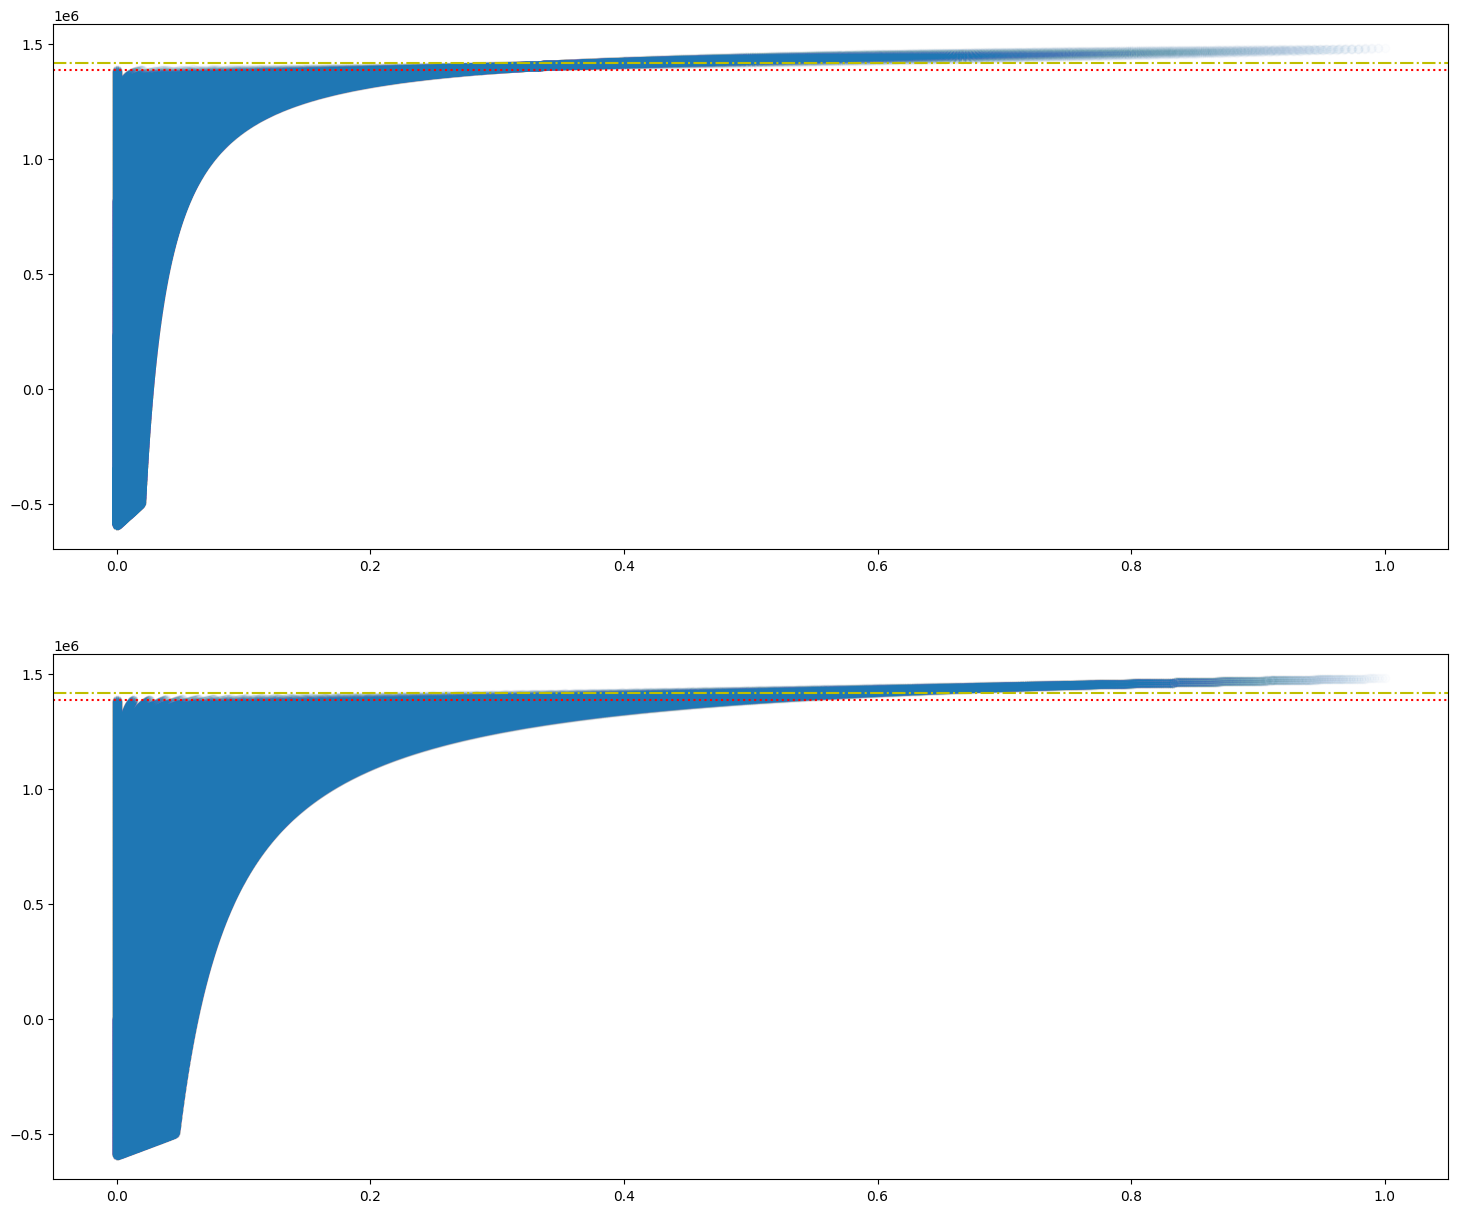

In [14]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(2, figsize=(18, 15))
axs[0].scatter(f1_scores, total_cash, alpha=0.01)
axs[1].scatter(f2_scores, total_cash, alpha=0.01)
for i in range(2):
    axs[i].axhline(y=baseline_cash, color='r', linestyle='dotted')
    axs[i].axhline(y=threshold_cash_line, color='y', linestyle='dashdot')